# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Load Dataset

In [2]:
df = pd.read_csv("spam.csv", encoding='latin-1')  # Some datasets have weird encoding
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

# Preprocess Data

<Axes: xlabel='label', ylabel='count'>

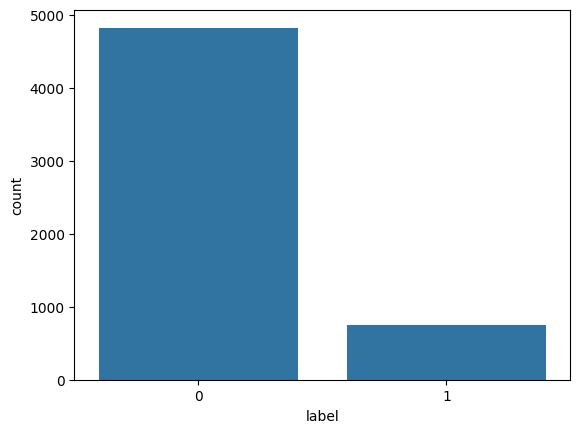

In [3]:
# Convert labels to binary
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Optional: Check class balance
sns.countplot(data=df, x='label')

# Split & Vectorize

In [4]:
X = df['message']
y = df['label']

# Vectorize using TF-IDF
vectorizer = TfidfVectorizer()
X_vect = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size=0.2, random_state=42)

# Train Classifier

In [5]:
model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate Model

✅ Accuracy Score: 0.9623
📊 Confusion Matrix:
 [[965   0]
 [ 42 108]]


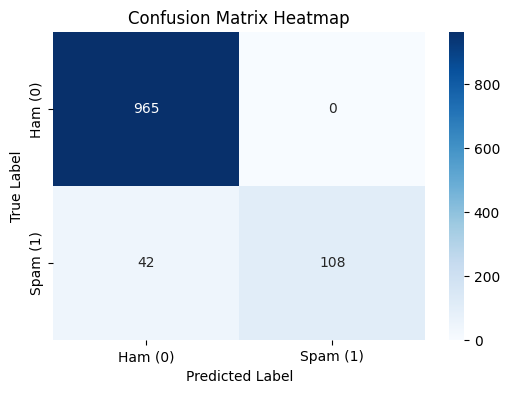

📋 Classification Report:


,precision,recall,f1-score,support
Ham (0),0.958292,1.000000,0.978702,965.000000
Spam (1),1.000000,0.720000,0.837209,150.000000
accuracy,0.962332,0.962332,0.962332,0.962332
macro avg,0.979146,0.860000,0.907956,1115.000000
weighted avg,0.963903,0.962332,0.959667,1115.000000


🔍 Sample Prediction Results:


,Actual,Predicted
265,0,0
101,0,0
1045,0,0
792,0,0
902,0,0
467,0,0
781,0,0
306,0,0
128,0,0
332,0,0


In [6]:
# 1. Basic Metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy Score: {accuracy:.4f}")

# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['Ham (0)', 'Spam (1)']

# 2.1: Display the raw matrix
print("📊 Confusion Matrix:\n", cm)

# 2.2: Plot confusion matrix with heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

# 3. Classification Report
report = classification_report(y_test, y_pred, target_names=labels, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print("📋 Classification Report:")
display(report_df)

# 4. Optional: Plot comparison of actual vs predicted
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_df.reset_index(drop=True, inplace=True)

# Show some random samples
print("🔍 Sample Prediction Results:")
display(comparison_df.sample(10, random_state=42))
